In [8]:
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IVGMM
from statsmodels.sandbox.regression.gmm import IV2SLS

df = pandas.read_stata('../cps09mar.dta')

In [4]:
list(df)

['age',
 'female',
 'hisp',
 'educ',
 'earnings',
 'hours',
 'week',
 'union',
 'uncov',
 'region',
 'race',
 'marital',
 'black',
 'lwage',
 'exp',
 'white',
 'wage',
 'exp2']

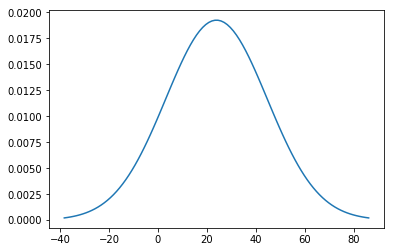

In [9]:
#(a) The density of hourly wage using a normal distribution
sigma = math.sqrt(df['wage'].var())
mu = df['wage'].mean()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

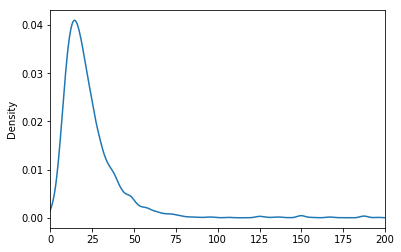

In [25]:
# (b) The density of hourly wage using the default kernel estimator
# STATA can suck it

plt.figure()
df['wage'].plot.density()
plt.xlim(0, 200)
plt.show()

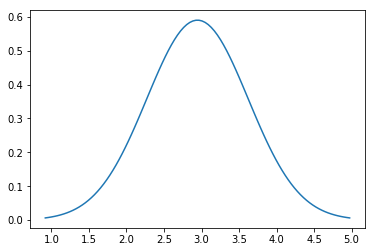

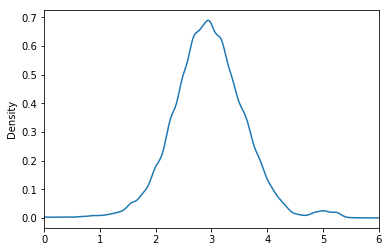

In [24]:
#(c) Repeat a. and b. for log wages and determine whether the normality assumption
#is reasonable for either situation (ie for wages or log wages
sigma = math.sqrt(df['lwage'].var())
mu = df['lwage'].mean()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

plt.figure()
df['lwage'].plot.density()
plt.xlim(0, 6)
plt.show()

In [ ]:
#(d) Do a non-parametric regression of wage (and then log wage) on experience sepa-
#rately for white males and white females and discuss the appropriateness of the
#quadratic model that we typically use as well as any differences between these
#two regressions.

from statsmodels.nonparametric.api import KernelReg

model = KernelReg(endog=df['wage'], exog=df['exp'], reg_type='ll', var_type='c', bw='cv_ls')
result = model.fit()
